# G2M insight for Cab Investment firm 

### Data Acquisition

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV files
cab_data = pd.read_csv('Cab_Data.csv')
customer_data = pd.read_csv('Customer_ID.csv')
transaction_data = pd.read_csv('Transaction_ID.csv')
city_data = pd.read_csv('City.csv')

In [2]:
print("Cab Data:")
print(cab_data.head())


Cab Data:
   Transaction ID Date of Travel   Company        City  KM Travelled  \
0        10000011     08-01-2016  Pink Cab  ATLANTA GA         30.45   
1        10000012     06-01-2016  Pink Cab  ATLANTA GA         28.62   
2        10000013     02-01-2016  Pink Cab  ATLANTA GA          9.04   
3        10000014     07-01-2016  Pink Cab  ATLANTA GA         33.17   
4        10000015     03-01-2016  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776  


### Calculating the total profit for each company


In [3]:
cab_data['Profit'] = cab_data['Price Charged'] - cab_data['Cost of Trip']

In [4]:
print(cab_data)


        Transaction ID Date of Travel     Company           City  \
0             10000011     08-01-2016    Pink Cab     ATLANTA GA   
1             10000012     06-01-2016    Pink Cab     ATLANTA GA   
2             10000013     02-01-2016    Pink Cab     ATLANTA GA   
3             10000014     07-01-2016    Pink Cab     ATLANTA GA   
4             10000015     03-01-2016    Pink Cab     ATLANTA GA   
...                ...            ...         ...            ...   
359387        10440101     08-01-2018  Yellow Cab  WASHINGTON DC   
359388        10440104     04-01-2018  Yellow Cab  WASHINGTON DC   
359389        10440105     05-01-2018  Yellow Cab  WASHINGTON DC   
359390        10440106     05-01-2018  Yellow Cab  WASHINGTON DC   
359391        10440107     02-01-2018  Yellow Cab  WASHINGTON DC   

        KM Travelled  Price Charged  Cost of Trip   Profit  
0              30.45         370.95      313.6350  57.3150  
1              28.62         358.52      334.8540  23.6660  


Yellow Cab Profit: 44020373.1708
Pink Cab Profit: 5307328.321


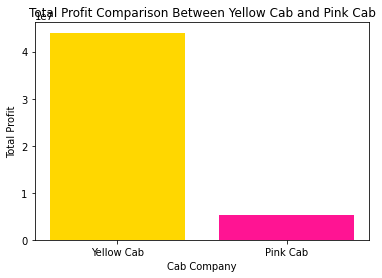

In [5]:
company_profit = cab_data.groupby('Company')['Profit'].sum()

# Access the total profit for Yellow Cab and Pink Cab
yellow_cab_profit = company_profit['Yellow Cab']
pink_cab_profit = company_profit['Pink Cab']

# Display the total profit for each company
print("Yellow Cab Profit:", yellow_cab_profit)
print("Pink Cab Profit:", pink_cab_profit)

colors = ['#FFD700', '#FF1493']
plt.bar(['Yellow Cab', 'Pink Cab'], [yellow_cab_profit, pink_cab_profit], color=colors)
plt.title('Total Profit Comparison Between Yellow Cab and Pink Cab')
plt.xlabel('Cab Company')
plt.ylabel('Total Profit')
plt.show()

 







#### As we see the profit for Yellow cab is much more than the Pink Cab under all conditions.Now Lets see the most preferred cab company by the users.

## Find the PREFERRED CAB COMPANY by Users

In [6]:
# merge cab_data and transaction_data
merged_data = pd.merge(cab_data, transaction_data, on='Transaction ID', how='inner')
print(merged_data.head)



<bound method NDFrame.head of         Transaction ID Date of Travel     Company           City  \
0             10000011     08-01-2016    Pink Cab     ATLANTA GA   
1             10000012     06-01-2016    Pink Cab     ATLANTA GA   
2             10000013     02-01-2016    Pink Cab     ATLANTA GA   
3             10000014     07-01-2016    Pink Cab     ATLANTA GA   
4             10000015     03-01-2016    Pink Cab     ATLANTA GA   
...                ...            ...         ...            ...   
359387        10440101     08-01-2018  Yellow Cab  WASHINGTON DC   
359388        10440104     04-01-2018  Yellow Cab  WASHINGTON DC   
359389        10440105     05-01-2018  Yellow Cab  WASHINGTON DC   
359390        10440106     05-01-2018  Yellow Cab  WASHINGTON DC   
359391        10440107     02-01-2018  Yellow Cab  WASHINGTON DC   

        KM Travelled  Price Charged  Cost of Trip   Profit  Customer ID  \
0              30.45         370.95      313.6350  57.3150        29290   
1  

In [7]:
company_preference = merged_data['Company'].value_counts()
preferred_company = company_preference.idxmax()

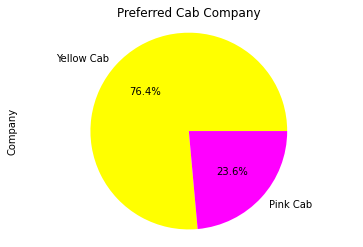

In [8]:
colors = ['yellow', 'magenta']
company_preference.plot(kind='pie', autopct='%1.1f%%', colors=colors)
plt.title('Preferred Cab Company')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

#### The analysis reveals a significant customer preference, with 76.4% of users favoring Yellow Cab and 23.6% preferring Pink Cab. This customer interest is a crucial factor in evaluating the performance of each cab company.
Yellow Cab's popularity suggests a higher level of trust among customers, potentially attributed to superior service, reliability, or brand recognition.Considering the overwhelming customer interest in Yellow Cab, there is a strong indication that strategic investments in this segment could yield substantial returns.

# Profit by city

In [9]:
profit_by_city = cab_data.groupby('City')['Price Charged', 'Cost of Trip'].sum()
profit_by_city['Profit'] = profit_by_city['Price Charged'] - profit_by_city['Cost of Trip']


C:\Users\Aysha1995\AppData\Local\Temp\ipykernel_10064\4265515206.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  profit_by_city = cab_data.groupby('City')['Price Charged', 'Cost of Trip'].sum()


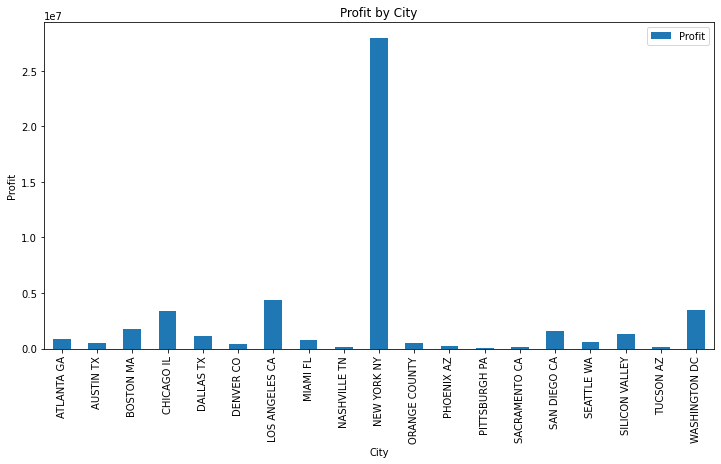

In [10]:
#import seaborn as sns

# Assuming 'profit_by_city' is the DataFrame with profit data
#sns.set_palette('deep')  # Set the color palette
#colors=['red', 'green', 'blue', 'purple', 'orange']
profit_by_city.plot(kind='bar', y='Profit', figsize=(12, 6))
plt.title('Profit by City')
plt.xlabel('City')
plt.ylabel('Profit')
plt.show()







#### Analysis reveals New York City as a profit leader, indicating strong market potential. Considering the focus of resources and expansion efforts in NYC for optimal returns and a competitive edge should be advantageous.

## Merging the transaction_data,Cab_data and Customer_data

In [11]:
merged_data = pd.merge(transaction_data, customer_data, on='Customer ID', how='inner')

# Merge the merged data with the cab dataset using the 'Transaction_ID' column
final_merged_data = pd.merge(merged_data, cab_data, on='Transaction ID', how='inner')

# The final_merged_data DataFrame now contains the merged dataset

In [12]:
print(final_merged_data.head)

<bound method NDFrame.head of         Transaction ID  Customer ID Payment_Mode  Gender  Age  \
0             10000011        29290         Card    Male   28   
1             10351127        29290         Cash    Male   28   
2             10412921        29290         Card    Male   28   
3             10000012        27703         Card    Male   27   
4             10320494        27703         Card    Male   27   
...                ...          ...          ...     ...  ...   
359387        10439790        38520         Card  Female   42   
359388        10439799        12490         Cash    Male   33   
359389        10439838        41414         Card    Male   38   
359390        10439840        41677         Cash    Male   23   
359391        10439846        39761         Card  Female   32   

        Income (USD/Month) Date of Travel     Company            City  \
0                    10813     08-01-2016    Pink Cab      ATLANTA GA   
1                    10813     21-07-2018  

In [13]:
import pandas as pd
data = final_merged_data

# Segment customers based on gender
gender_segments = data.groupby('Gender')

# Segment customers based on age
age_segments = pd.cut(data['Age'], bins=[0, 18, 35, 50, 100], labels=['Under 18', '18-34', '35-49', '50+'])

# Segment customers based on income 
income_segments = pd.cut(data['Income (USD/Month)'], bins=[0, 30000, 60000, 90000, 120000], labels=['0-30K', '30-60K', '60-90K', '90-120K'])


print(gender_segments.get_group('Male'))
print(age_segments.value_counts())
print(income_segments.value_counts())


        Transaction ID  Customer ID Payment_Mode Gender  Age  \
0             10000011        29290         Card   Male   28   
1             10351127        29290         Cash   Male   28   
2             10412921        29290         Card   Male   28   
3             10000012        27703         Card   Male   27   
4             10320494        27703         Card   Male   27   
...                ...          ...          ...    ...  ...   
359383        10439419        46512         Cash   Male   20   
359385        10439428        46912         Card   Male   51   
359388        10439799        12490         Cash   Male   33   
359389        10439838        41414         Card   Male   38   
359390        10439840        41677         Cash   Male   23   

        Income (USD/Month) Date of Travel     Company            City  \
0                    10813     08-01-2016    Pink Cab      ATLANTA GA   
1                    10813     21-07-2018  Yellow Cab      ATLANTA GA   
2           

## Cab users bt Age and income

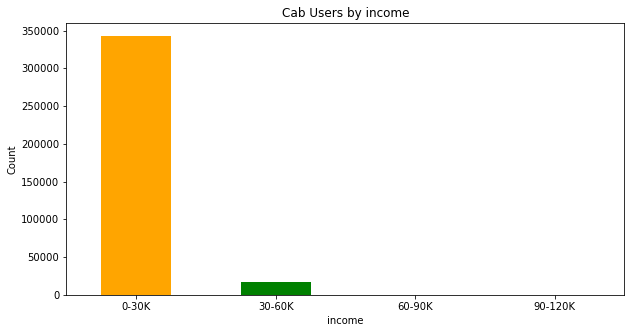

In [14]:
income_counts = income_segments.value_counts()

# Plot age segmentation
plt.figure(figsize=(10,5))
income_counts.plot(kind='bar', color=['orange','green','navy','black'])
plt.title('Cab Users by income')
plt.xlabel('income')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

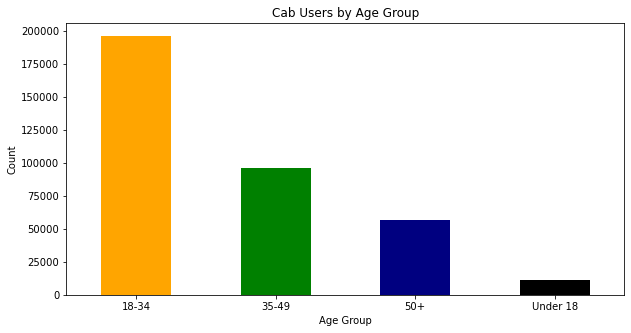

In [15]:
age_counts = age_segments.value_counts()

# Plot age segmentation
plt.figure(figsize=(10,5))
age_counts.plot(kind='bar', color=['orange','green','navy','black'])
plt.title('Cab Users by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

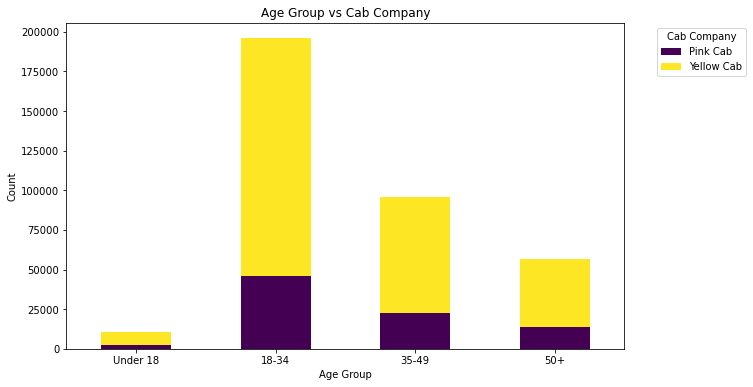

In [16]:
age_company_df = pd.DataFrame({'Age Group': age_segments, 'Company': data['Company']})

# Create a cross-tabulation of age groups and cab companies
age_company_cross = pd.crosstab(age_company_df['Age Group'], age_company_df['Company'])

# Plot the bar chart
age_company_cross.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))
plt.title('Age Group vs Cab Company')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Cab Company', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

The data highlights a trend where individuals aged 18-24 with an income between 0-30k are the primary users of cab services. Recognizing this pattern, focusing marketing efforts and services tailored to the preferences of this demographic can lead to increased customer satisfaction and retention.

## Average Km per ride for different cities for pink and yellow cab

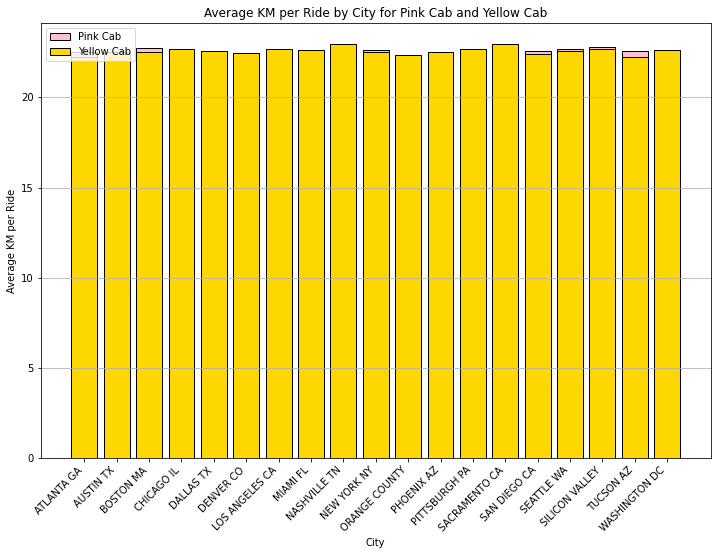

In [17]:
pink_cab_data = data[data['Company'] == 'Pink Cab']

# Filter data for Yellow Cab rides
yellow_cab_data = data[data['Company'] == 'Yellow Cab']

# Group data by city and calculate the total number of rides and total KM traveled for Pink Cab
pink_city_stats = pink_cab_data.groupby('City').agg({
    'Transaction ID': 'count',
    'KM Travelled': 'sum'
}).reset_index()

# Calculate KM per Ride for Pink Cab
pink_city_stats['KM per Ride'] = pink_city_stats['KM Travelled'] / pink_city_stats['Transaction ID']

# Group data by city and calculate the total number of rides and total KM traveled for Yellow Cab
yellow_city_stats = yellow_cab_data.groupby('City').agg({
    'Transaction ID': 'count',
    'KM Travelled': 'sum'
}).reset_index()

# Calculate KM per Ride for Yellow Cab
yellow_city_stats['KM per Ride'] = yellow_city_stats['KM Travelled'] / yellow_city_stats['Transaction ID']

# Bar chart
plt.figure(figsize=(12, 8))
plt.bar(pink_city_stats['City'], pink_city_stats['KM per Ride'], color='pink', edgecolor='black', label='Pink Cab')
plt.bar(yellow_city_stats['City'], yellow_city_stats['KM per Ride'], color='gold', edgecolor='black', label='Yellow Cab')

plt.title('Average KM per Ride by City for Pink Cab and Yellow Cab')
plt.xlabel('City')
plt.ylabel('Average KM per Ride')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(axis='y')
plt.show()

### The average kilometers per ride in different cities indicate that Yellow Cab consistently has a higher value compared to Pink Cab.

## Payment Preference

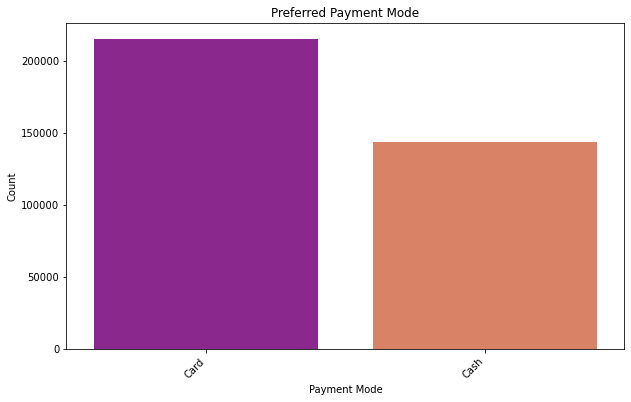

In [23]:
import seaborn as sns
payment_mode_counts = data['Payment_Mode'].value_counts()

# Bar chart with Inferno color map
plt.figure(figsize=(10, 6))
sns.barplot(x=payment_mode_counts.index, y=payment_mode_counts.values, palette='plasma')

plt.title('Preferred Payment Mode')
plt.xlabel('Payment Mode')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

The majority of cab users prefer making payments through card transactions rather than cash, reflecting a trend towards digital payment convenience and security.

In [18]:
from matplotlib import colormaps
list(colormaps)
# Convert 'Date of travel' to datetime format
data['Date of Travel'] = pd.to_datetime(data['Date of Travel'])



C:\Users\Aysha1995\AppData\Local\Temp\ipykernel_10064\15472755.py:4: UserWarning: Parsing '21-07-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['Date of Travel'] = pd.to_datetime(data['Date of Travel'])
C:\Users\Aysha1995\AppData\Local\Temp\ipykernel_10064\15472755.py:4: UserWarning: Parsing '23-11-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['Date of Travel'] = pd.to_datetime(data['Date of Travel'])
C:\Users\Aysha1995\AppData\Local\Temp\ipykernel_10064\15472755.py:4: UserWarning: Parsing '21-04-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['Date of Travel'] = pd.to_datetime(data['Date of Travel'])
C:\Users\Aysha1995\AppData\Local\Temp\ipykernel_10064\15472755.py:4: UserWarning: Parsing '27-10-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent par

## Total profit for all years for both cabs

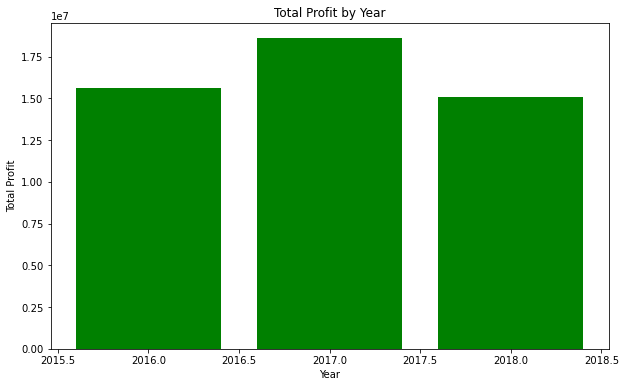

In [19]:
# Extract the year from 'Date of travel'
data['Year'] = data['Date of Travel'].dt.year

# Calculate profit
data['Profit'] = data['Price Charged'] - data['Cost of Trip']

# Group by year and calculate the total profit for each year
profit_by_year = data.groupby('Year')['Profit'].sum().reset_index()

# Bar chart to visualize the profit by year
plt.figure(figsize=(10, 6))
plt.bar(profit_by_year['Year'], profit_by_year['Profit'], color='green')
plt.title('Total Profit by Year')
plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.show()

# Yearly profit of each month for all the years

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'cab_data' with columns 'Date of Travel', 'Company', and 'Profit'
# Make sure 'Date of Travel' is in datetime format
cab_data['Date of Travel'] = pd.to_datetime(cab_data['Date of Travel'])



C:\Users\Aysha1995\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14-01-2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Aysha1995\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13-01-2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Aysha1995\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '17-01-2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Aysha1995\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '18-01-2016' in DD/MM/YYYY format. Provide 

### 2017

C:\Users\Aysha1995\AppData\Local\Temp\ipykernel_10064\2405055892.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cab_data_2017['Month'] = cab_data_2017['Date of Travel'].dt.month


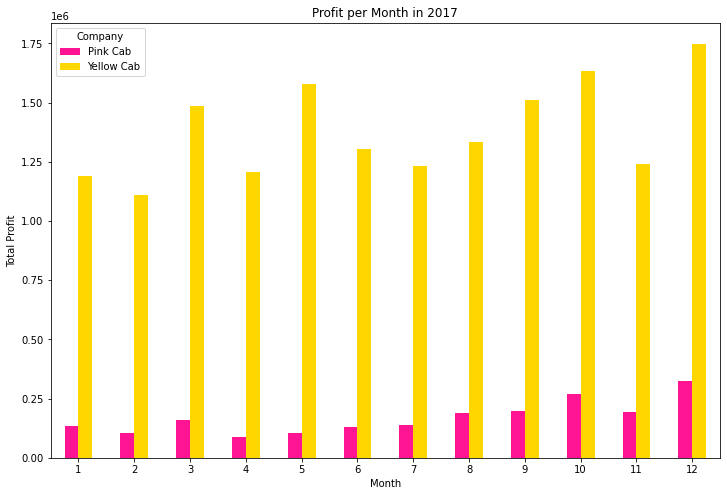

In [21]:
cab_data_2017 = cab_data[(cab_data['Date of Travel'].dt.year == 2017)]

# Extract month from 'Date of Travel'
cab_data_2017['Month'] = cab_data_2017['Date of Travel'].dt.month

# Group data by Company and Month, then calculate the sum of Profit
profit_per_month = cab_data_2017.groupby(['Company', 'Month'])['Profit'].sum().reset_index()

# Pivot the table for better visualization
profit_per_month_pivot = profit_per_month.pivot(index='Month', columns='Company', values='Profit')

# Plotting the bar chart
profit_per_month_pivot.plot(kind='bar', figsize=(12, 8), color= ['#FF1493', '#FFD700'])
plt.title('Profit per Month in 2017')
plt.xlabel('Month')
plt.ylabel('Total Profit')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()

### 2016

C:\Users\Aysha1995\AppData\Local\Temp\ipykernel_27284\3093310551.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cab_data_2016['Month'] = cab_data_2016['Date of Travel'].dt.month


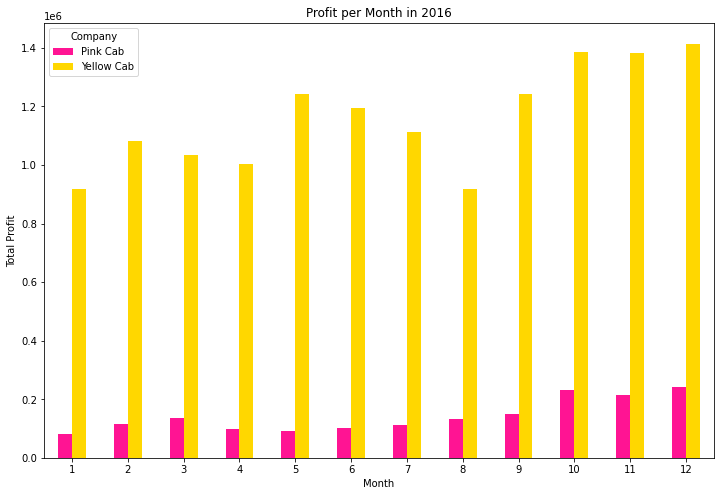

In [26]:
cab_data_2016 = cab_data[(cab_data['Date of Travel'].dt.year == 2016)]

# Extract month from 'Date of Travel'
cab_data_2016['Month'] = cab_data_2016['Date of Travel'].dt.month

# Group data by Company and Month, then calculate the sum of Profit
profit_per_month = cab_data_2016.groupby(['Company', 'Month'])['Profit'].sum().reset_index()

# Pivot the table for better visualization
profit_per_month_pivot = profit_per_month.pivot(index='Month', columns='Company', values='Profit')

# Plotting the bar chart
profit_per_month_pivot.plot(kind='bar', figsize=(12, 8), color= ['#FF1493', '#FFD700'])
plt.title('Profit per Month in 2016')
plt.xlabel('Month')
plt.ylabel('Total Profit')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()


### 2018

In [ ]:
cab_data_2018 = cab_data[(cab_data['Date of Travel'].dt.year == 2018)]

# Extract month from 'Date of Travel'
cab_data_2018['Month'] = cab_data_2018['Date of Travel'].dt.month

# Group data by Company and Month, then calculate the sum of Profit
profit_per_month = cab_data_2018.groupby(['Company', 'Month'])['Profit'].sum().reset_index()

# Pivot the table for better visualization
profit_per_month_pivot = profit_per_month.pivot(index='Month', columns='Company', values='Profit')

# Plotting the bar chart
profit_per_month_pivot.plot(kind='bar', figsize=(12, 8), color= ['#FF1493', '#FFD700'])
plt.title('Profit per Month in 2018')
plt.xlabel('Month')
plt.ylabel('Total Profit')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()

In [28]:
cab_data_2017 = cab_data[(cab_data['Date of Travel'].dt.year == 2017)]

# Extract month from 'Date of Travel'
cab_data_2017['Month'] = cab_data_2017['Date of Travel'].dt.month

# Group data by Company and Month, then calculate the sum of Profit
profit_per_month = cab_data_2017.groupby(['Company', 'Month'])['Profit'].sum().reset_index()

# Pivot the table for better visualization
profit_per_month_pivot = profit_per_month.pivot(index='Month', columns='Company', values='Profit')

# Display the table
print(profit_per_month_pivot)
max_profit_month_yellow = profit_per_month_pivot['Yellow Cab'].idxmax()
max_profit_month_pink = profit_per_month_pivot['Pink Cab'].idxmax()

Company    Pink Cab    Yellow Cab
Month                            
1        135281.717  1.191174e+06
2        104212.637  1.109518e+06
3        158737.294  1.487014e+06
4         88707.342  1.205093e+06
5        105167.430  1.579108e+06
6        130801.544  1.302222e+06
7        137692.651  1.230314e+06
8        189156.289  1.335073e+06
9        198919.309  1.512277e+06
10       268209.746  1.634391e+06
11       192173.705  1.240731e+06
12       324595.244  1.749062e+06


C:\Users\Aysha1995\AppData\Local\Temp\ipykernel_27284\2524214008.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cab_data_2017['Month'] = cab_data_2017['Date of Travel'].dt.month


In [29]:
data['Month'] = pd.to_datetime(data['Date of Travel']).dt.month_name()
monthly_profit = data.groupby(['Month', 'Company'])['Profit'].sum().reset_index()

# Find the month with the highest profit for each company
max_profit_month = monthly_profit.loc[monthly_profit.groupby('Company')['Profit'].idxmax()]

print(max_profit_month)

      Month     Company        Profit
4  December    Pink Cab  7.985355e+05
5  December  Yellow Cab  4.620731e+06


### The profitability analysis over three years highlights a significant increase, particularly in the year 2017. Further examination reveals a substantial spike in profits during the month of December, particularly attributable to Yellow Cab. This suggests a potential pattern of heightened profitability during specific time frames, providing an opportunity for strategic planning and targeted marketing efforts during peak months.







## Month with highest profit

In [24]:
from pandas.plotting import table

# Pivot the table for better visualization
profit_per_month_pivot = profit_per_month.pivot(index='Month', columns='Company', values='Profit')
styled_table = profit_per_month_pivot.style.highlight_max(axis=0, color='yellow')


# Display the styled table
styled_table



Company,Pink Cab,Yellow Cab
Month,,
April,88707.342000,1205093.292800
August,189156.289000,1335072.662400
December,324595.244000,1749062.131200
February,104212.637000,1109517.578800
January,135281.717000,1191173.562400
July,137692.651000,1230314.320800
June,130801.544000,1302222.186400
March,158737.294000,1487014.376000
May,105167.430000,1579108.406000


## Day with highest profit during the month of December

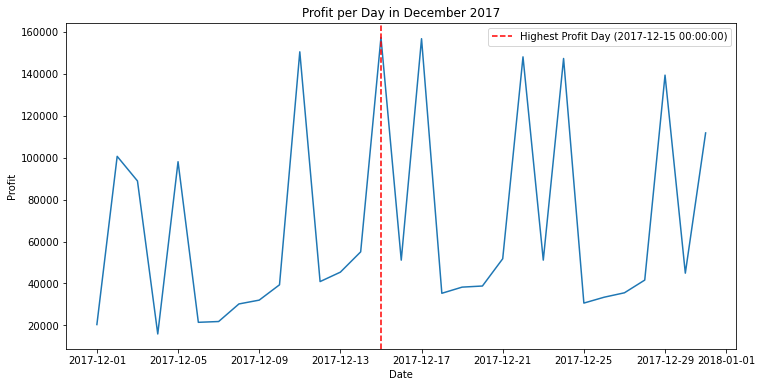

,Date of Travel,Profit
0,2017-12-01 00:00:00,20383.040200
1,2017-12-02 00:00:00,100631.715000
2,2017-12-03 00:00:00,88889.538600
3,2017-12-04 00:00:00,15889.345800
4,2017-12-05 00:00:00,98070.059200
5,2017-12-06 00:00:00,21449.930800
6,2017-12-07 00:00:00,21828.985400
7,2017-12-08 00:00:00,30214.643800
8,2017-12-09 00:00:00,32038.349400
9,2017-12-10 00:00:00,39344.924600


In [30]:
import seaborn as sns
data['Year'] = pd.to_datetime(data['Date of Travel']).dt.month_name()

# Filter data for December 2017
cab_data_dec_2017 = cab_data[(cab_data['Date of Travel'].dt.year == 2017) & (cab_data['Date of Travel'].dt.month == 12)]

# Group data by date and calculate the sum of profit
profit_per_day = cab_data_dec_2017.groupby('Date of Travel')['Profit'].sum().reset_index()

# Find the day with the highest profit
max_profit_day = profit_per_day.loc[profit_per_day['Profit'].idxmax()]['Date of Travel']

# Visualize profit per day
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date of Travel', y='Profit', data=profit_per_day)
plt.title('Profit per Day in December 2017')
plt.xlabel('Date')
plt.ylabel('Profit')

# Highlight the day with the highest profit
plt.axvline(x=max_profit_day, color='red', linestyle='--', label=f'Highest Profit Day ({max_profit_day})')
plt.legend()

plt.show()

# Display the styled table
styled_table = profit_per_day.style.highlight_max(subset=['Profit'], color='orange', axis=0)
styled_table

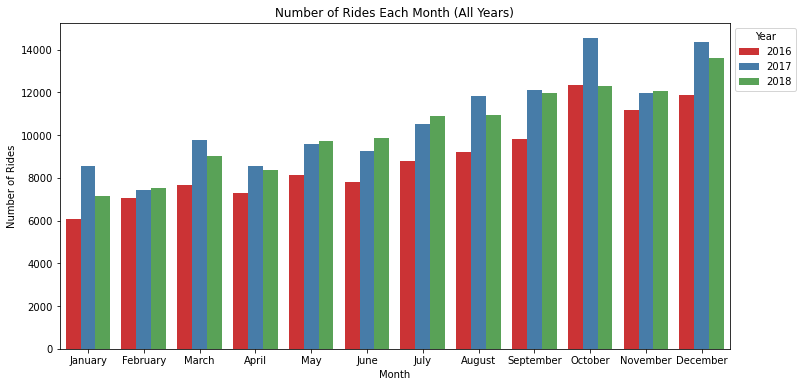

In [33]:
cab_data['Month'] = cab_data['Date of Travel'].dt.month_name()
cab_data['Year'] = cab_data['Date of Travel'].dt.year.astype(str)
rides_count = cab_data.groupby(['Year', 'Month']).size().reset_index(name='Rides Count')

# Define the order of months
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='Rides Count', hue='Year', data=rides_count, order=month_order, palette='Set1')
plt.title('Number of Rides Each Month (All Years)')
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

Analyzing the surge in ride numbers during October provides valuable insights for strategic business decisions. If this uptick is associated with specific events or occasions, the company can leverage targeted promotions and fine-tune its fleet management to efficiently meet the heightened demand during this month. By understanding the root causes, the business can optimize its approach, ensuring it aligns seamlessly with customer needs and maximizes opportunities for growth.

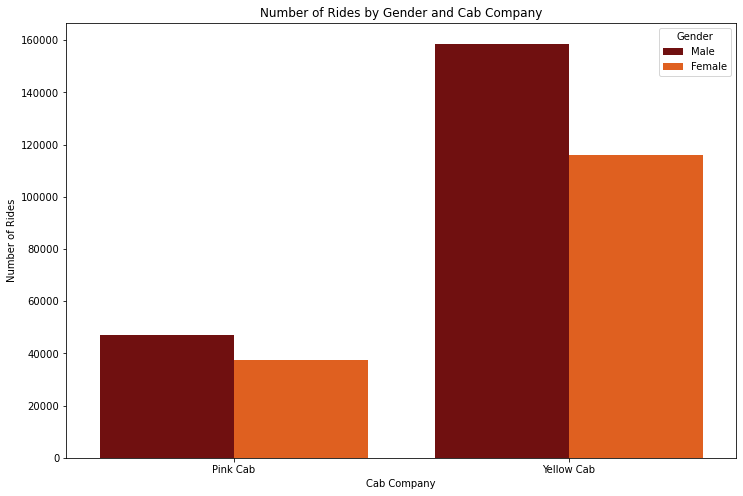

In [34]:
# Countplot of rides by Gender and Cab Company
plt.figure(figsize=(12, 8))
sns.countplot(x='Company', hue='Gender', data=final_merged_data,palette='gist_heat')
plt.title('Number of Rides by Gender and Cab Company')
plt.xlabel('Cab Company')
plt.ylabel('Number of Rides')
plt.show()

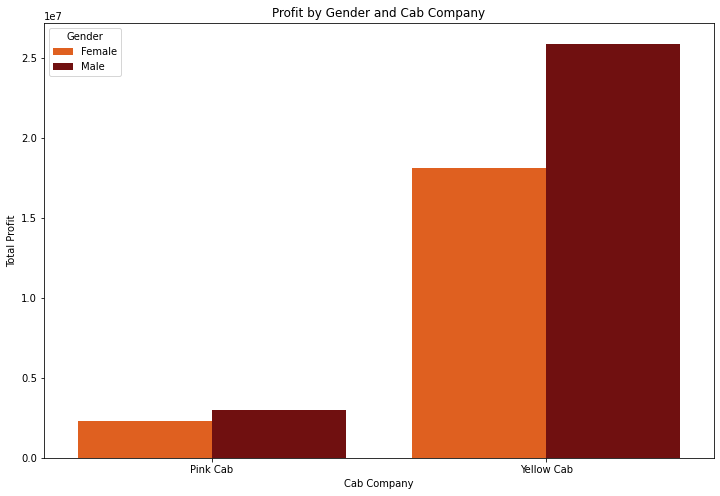

      Company  Gender        Profit
0    Pink Cab  Female  2.330533e+06
1    Pink Cab    Male  2.976796e+06
2  Yellow Cab  Female  1.813142e+07
3  Yellow Cab    Male  2.588896e+07


In [35]:
# Assuming you have a DataFrame named 'final_merged_data' with columns 'Company', 'Gender', and 'Profit'
# You can replace 'final_merged_data' with your actual DataFrame

# Group by Company and Gender, summing up the profits
profit_by_gender = final_merged_data.groupby(['Company', 'Gender'])['Profit'].sum().reset_index()

# Plot a bar chart to visualize the results
plt.figure(figsize=(12, 8))
sns.barplot(x='Company', y='Profit', hue='Gender', data=profit_by_gender, palette='gist_heat_r')
plt.title('Profit by Gender and Cab Company')
plt.xlabel('Cab Company')
plt.ylabel('Total Profit')
plt.show()
print(profit_by_gender)


The analysis indicates a notable trend in user demographics, with a higher number of male cab users compared to females. Additionally, the data reveals that the profit generated from male users surpasses that from female users. This insight highlights the significance of tailoring services and marketing strategies to the predominant user demographic, potentially optimizing profitability.

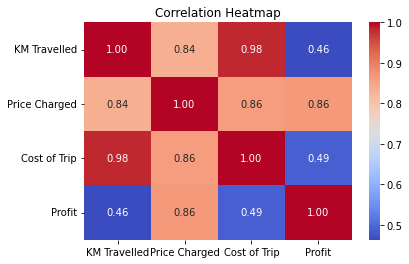

In [32]:
numerical_variables = final_merged_data[['KM Travelled', 'Price Charged', 'Cost of Trip', 'Profit']]
correlation_matrix = numerical_variables.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [33]:
correlation_table = correlation_matrix.style.background_gradient(cmap='coolwarm').set_precision(2)
correlation_table

C:\Users\Aysha1995\AppData\Local\Temp\ipykernel_10064\135048978.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  correlation_table = correlation_matrix.style.background_gradient(cmap='coolwarm').set_precision(2)


,KM Travelled,Price Charged,Cost of Trip,Profit
KM Travelled,1.00,0.84,0.98,0.46
Price Charged,0.84,1.00,0.86,0.86
Cost of Trip,0.98,0.86,1.00,0.49
Profit,0.46,0.86,0.49,1.00


KM Travelled and Price Charged (0.84): There is a strong positive correlation (0.84) between the distance traveled (KM Travelled) and the charged price (Price Charged). This indicates that longer distances tend to result in higher charges.

KM Travelled and Cost of Trip (0.98): There is a very strong positive correlation (0.98) between the distance traveled (KM Travelled) and the cost of the trip (Cost of Trip). This suggests that as the distance increases, the cost of the trip also increases significantly.

KM Travelled and Profit (0.46): There is a moderate positive correlation (0.46) between the distance traveled (KM Travelled) and the profit. This indicates that longer distances contribute to higher profits, but the relationship is not as strong as with the cost or price.

Price Charged and Cost of Trip (0.86): There is a strong positive correlation (0.86) between the charged price (Price Charged) and the cost of the trip (Cost of Trip). This suggests that as the price charged increases, the cost of the trip also tends to increase.

Price Charged and Profit (0.86): There is a strong positive correlation (0.86) between the charged price (Price Charged) and the profit. This indicates that higher charged prices contribute significantly to higher profits.

Cost of Trip and Profit (0.49): There is a moderate positive correlation (0.49) between the cost of the trip (Cost of Trip) and the profit. This suggests that higher costs are associated with higher profits, but the relationship is not as strong as with the charged price.